In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import skimage as si

### Auxiliar Methods


In [5]:
def showImage(imageTitle, image):
    cv2.imshow(imageTitle, image)
    cv2.waitKey()
    cv2.destroyAllWindows()

### Auxiliar Variables


In [42]:
falconImage = cv2.imread("../ImageDatabase/falcon.jpg")

# Ex. 1.

## Ex. 1.1.

In [3]:
image = cv2.imread("../ImageDatabase/falcon.jpg")
showImage("falcon", image)

## Ex. 1.2.

In [39]:
camera = cv2.VideoCapture(0) #Id da camera. Caso tenha mais que uma, tem que se incrementar o id até encontrar a que procuro.
#cv2.VideoCapture("videoPath.avi") #Caso não queiramos camera, mas sim um vídeo pré-feito.
flag, imagem = camera.read() #Devolve uma flag, que indica se foi possível tirar a fotografia ou não. O segundo valor é a imagem.

if flag:
    showImage("Imagem da camera", imagem)
    #camera.release()
else:
    print("Não foi possível obter imagem")
    
# Para obter "vídeo" (frames individuais)
flagCiclo = True

# Factor para Modificar o seu Tamanho
downScaleFactor = 0.25
upScaleFactor = 1 / downScaleFactor

while flagCiclo:
    flag, video = camera.read()
    
    #Caso queira testar o Blur.
    #videoBlur = cv2.blur(video, (21, 21))
    
    #Caso queira testar o Resize
    videoDownScale = cv2.resize(video, None, fx = downScaleFactor, fy = downScaleFactor, interpolation=cv2.INTER_NEAREST)
    videoUpScale = cv2.resize(videoDownScale, None, fx = upScaleFactor, fy = upScaleFactor, interpolation=cv2.INTER_NEAREST)
    
    if flag:
        #cv2.imshow("Video", video)
        #cv2.imshow("Video", videoBlur)   #Blur
        cv2.imshow("Video", videoUpScale) #Resize
        
    key = cv2.waitKey(1)
    
    if key == 27:
        flagCiclo = False
        
cv2.destroyAllWindows()
camera.release()

## Ex. 1.3.

In [54]:
resizedImage = cv2.resize(falconImage, (256, 256))
showImage("Resized Image", resizedImage)

#FingerPrint
downScaleFactor = 0.25
upScaleFactor = 1 / downScaleFactor

fingerPrintImage = cv2.imread("../ImageDatabase/fingerprint.jpg")
downScaleFingerPrintImage = cv2.resize(fingerPrintImage, None, fx = downScaleFactor, fy = downScaleFactor, interpolation=cv2.INTER_NEAREST)
upScaleFingerPrintImage = cv2.resize(fingerPrintImage, None, fx = upScaleFactor, fy = upScaleFactor, interpolation=cv2.INTER_NEAREST)

showImage("Fingerprint Resized", downScaleFingerPrintImage)

# Ex. 2.

## Ex. 2.1.

In [6]:
databasePath = "../ImageDatabase/"
objectImage = cv2.imread(databasePath + "falcon.jpg")
mask = cv2.imread(databasePath + "mask.png")
background = cv2.imread(databasePath + "florest.jpg")

imageOut = objectImage * mask + background * cv2.bitwise_not(mask)
imageOut_v2 = cv2.add(cv2.multiply(objectImage, mask), cv2.multiply(background, cv2.bitwise_not(mask)))
imageOut_v3 = cv2.add(cv2.multiply(objectImage, mask, scale=1/255), cv2.multiply(background, (255 - mask), scale=1/255))

showImage("Image Out direct Formula", imageOut)
showImage("Image Out cv2 Formula", imageOut_v2)
showImage("Image Out cv3 Formula", imageOut_v3)

print(objectImage.dtype, " ", mask.dtype, " ", background.dtype)

print((mask / 255).dtype)
test1 = (objectImage * (mask / 255).astype(np.uint8)).astype(np.uint8)
test21 = 255 - mask
test22 = (background * (test21 / 255).astype(np.uint8)).astype(np.uint8)
test = test1 + test22

showImage("test1", test1)
showImage("test21", test21)
showImage("test22", test22)
showImage("test", test)

print(test1.dtype)
print(test21.dtype)
print(test22.dtype)
print(test.dtype)

uint8   uint8   uint8
float64
uint8
uint8
uint8
uint8


## Ex. 2.2.

In [89]:
#Blur
bluredImage = cv2.blur(objectImage, (10, 10))
showImage("Blured Image", bluredImage)

#Median Blur
#medianBluredImage = cv2.medianBlur(objectImage, 2)
#showImage("Median Blured Image", medianBluredImage)

#Gaussian Blur
#gaussianBluredImage = cv2.GaussianBlur(objectImage, (10, 10), 0)
#showImage("Gaussian Blured Image", gaussianBluredImage)

#getGaussianKernel()
gaussianKernel = cv2.getGaussianKernel(3, 1)
print("Gaussian Kernel:\n", gaussianKernel, "\n")

#filter2D()
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
filter2D = (objectImage, -1, kernel)
#showImage("", filter2D)

Gaussian Kernel:
 [[0.27406862]
 [0.45186276]
 [0.27406862]] 



## Ex. 2.3.

In [88]:
#O ponto central no y é o que oferece uma melhor rotação.
#Não percebo o porquê

rotationMatrix = cv2.getRotationMatrix2D((objectImage.shape[1] / 2, objectImage.shape[1] / 2), 90, 1)
rotatedImage = cv2.warpAffine(objectImage, rotationMatrix, (objectImage.shape[0], objectImage.shape[1]))
showImage("", rotatedImage)

# Ex. 3.

## Ex. 3.1.

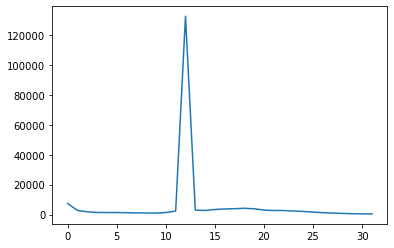

In [9]:
histogramBlue = cv2.calcHist([objectImage], [0], None, [256], [0,256])
histogramGreen = cv2.calcHist([objectImage], [1], None, [256], [0,256])
histogramRed = cv2.calcHist([objectImage], [2], None, [256], [0,256])
histogram = cv2.calcHist([objectImage], [0], None, [32], [0,256])

#plt.plot(histogramBlue, color="blue")
#plt.plot(histogramGreen, color="green")
#plt.plot(histogramRed, color="red")
plt.plot(histogram)

# Ex. 5.

## Ex. 5.1.

In [10]:
greyScaleImage = cv2.cvtColor(objectImage, cv2.COLOR_BGR2GRAY)

sobelHorizontal = cv2.Sobel(greyScaleImage, cv2.CV_16S, 1, 0, ksize = 3)
sobelVertical = cv2.Sobel(greyScaleImage, cv2.CV_16S, 0, 1, ksize = 3)

absHorizontal = cv2.convertScaleAbs(sobelHorizontal)
absVertical = cv2.convertScaleAbs(sobelVertical)

contouredImage = cv2.addWeighted(absHorizontal, 0.5, absVertical, 0.5, 0)
showImage("Contours Image", contouredImage)

## Ex. 5.2.

In [11]:
#?

# Ex. 6.

## Ex. 6.1.